<h1 style="color:#89CFF0"> Predicting Diabetes </h1>
<h3 style="color:#89CFF0">Objective:</h3> Predict whether users are in risk of diabetes or not.

#### <span style="color:#89CFF0">Dataset Used</span>

The dataset used in this project is the clean dataset of 70692 survey responses to the CDC BRFSS2015. 

This dataset contains 22 feature columns:
1. Diabetes_binary:
0 = no diabetes 1 = prediabetes or diabetes
2. HighBP:
0 = no high BP 1 = high BP
3. HighChol:
0 = no high cholesterol 1 = high cholesterol
4. CholCheck:
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5. BMI:
Body Mass Index
6. Smoker:
Have you smoked at least 100 cigarettes in your entire life? 
[Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7. Stroke:
(Ever told) you had a stroke. 0 = no 1 = yes
8. Heartdisease or attack:
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9. PhysActivity:
physical activity in past 30 days - not including job 0 = no 1 = yes
10. Fruits:
Consume Fruit 1 or more times per day 0 = no 1 = yes
11. Veggies:
Consume Vegetables 1 or more times per day 0 = no 1 = yes
12. HvyAlcoholConsump:
(adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
13. AnyHealthcare:
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
14. NoDocbcCost:
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
15. GenHlth:
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. MentHlth:
days of poor mental health scale 1-30 days
17. PhysHlth:
physical illness or injury days in past 30 days scale 1-30
18. DiffWalk:
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
19. Sex:
0 = female 1 = male
20. Age:
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
21. Education:
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.
22. Income:
Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df= pd.read_csv('dataset.csv')

#### <span style="color:#89CFF0">Data Wrangling</span>

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [387]:
df.shape

(70692, 22)

In [388]:
columns = ['Age', 'Sex'] + [col for col in df if col not in ['Age', 'Sex', 'Diabetes_binary']] + ['Diabetes_binary']
df = df[columns]
df.head()

,Age,Sex,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Education,Income,Diabetes_binary
0,4.0,1.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,5.0,30.0,0.0,6.0,8.0,0.0
1,12.0,1.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,8.0,0.0
2,13.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,10.0,0.0,6.0,8.0,0.0
3,11.0,1.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,3.0,0.0,3.0,0.0,6.0,8.0,0.0
4,8.0,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,5.0,8.0,0.0


In [389]:
df.duplicated().sum()

np.int64(1635)

In [390]:
df.drop_duplicates(inplace=True)

In [391]:
df.isnull().sum()

Age                     0
Sex                     0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [417]:
# List of columns to exclude from value_counts
exclude_columns = ['GenHlth', 'MentHlth', 'PhysHlth','Education', 'Income','Age','BMI', 'GenHlth_scaled','MentHlth_scaled','PhysHlth_scaled','Education_scaled','Income_scaled']

# Iterate through all columns and get value_counts for those not in the exclude list
for col in df.columns:
    if col not in exclude_columns:
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("\n")  # Adding a line break for clarity


Value counts for Sex:
Sex
0.0    36635
1.0    30803
Name: count, dtype: int64


Value counts for HighBP:
HighBP
1.0    38231
0.0    29207
Name: count, dtype: int64


Value counts for HighChol:
HighChol
1.0    35641
0.0    31797
Name: count, dtype: int64


Value counts for CholCheck:
CholCheck
1.0    65706
0.0     1732
Name: count, dtype: int64


Value counts for Smoker:
Smoker
0.0    34879
1.0    32559
Name: count, dtype: int64


Value counts for Stroke:
Stroke
0.0    63156
1.0     4282
Name: count, dtype: int64


Value counts for HeartDiseaseorAttack:
HeartDiseaseorAttack
0.0    57379
1.0    10059
Name: count, dtype: int64


Value counts for PhysActivity:
PhysActivity
1.0    47216
0.0    20222
Name: count, dtype: int64


Value counts for Fruits:
Fruits
1.0    40929
0.0    26509
Name: count, dtype: int64


Value counts for Veggies:
Veggies
1.0    52948
0.0    14490
Name: count, dtype: int64


Value counts for HvyAlcoholConsump:
HvyAlcoholConsump
0.0    64478
1.0     2960
Name: count, d

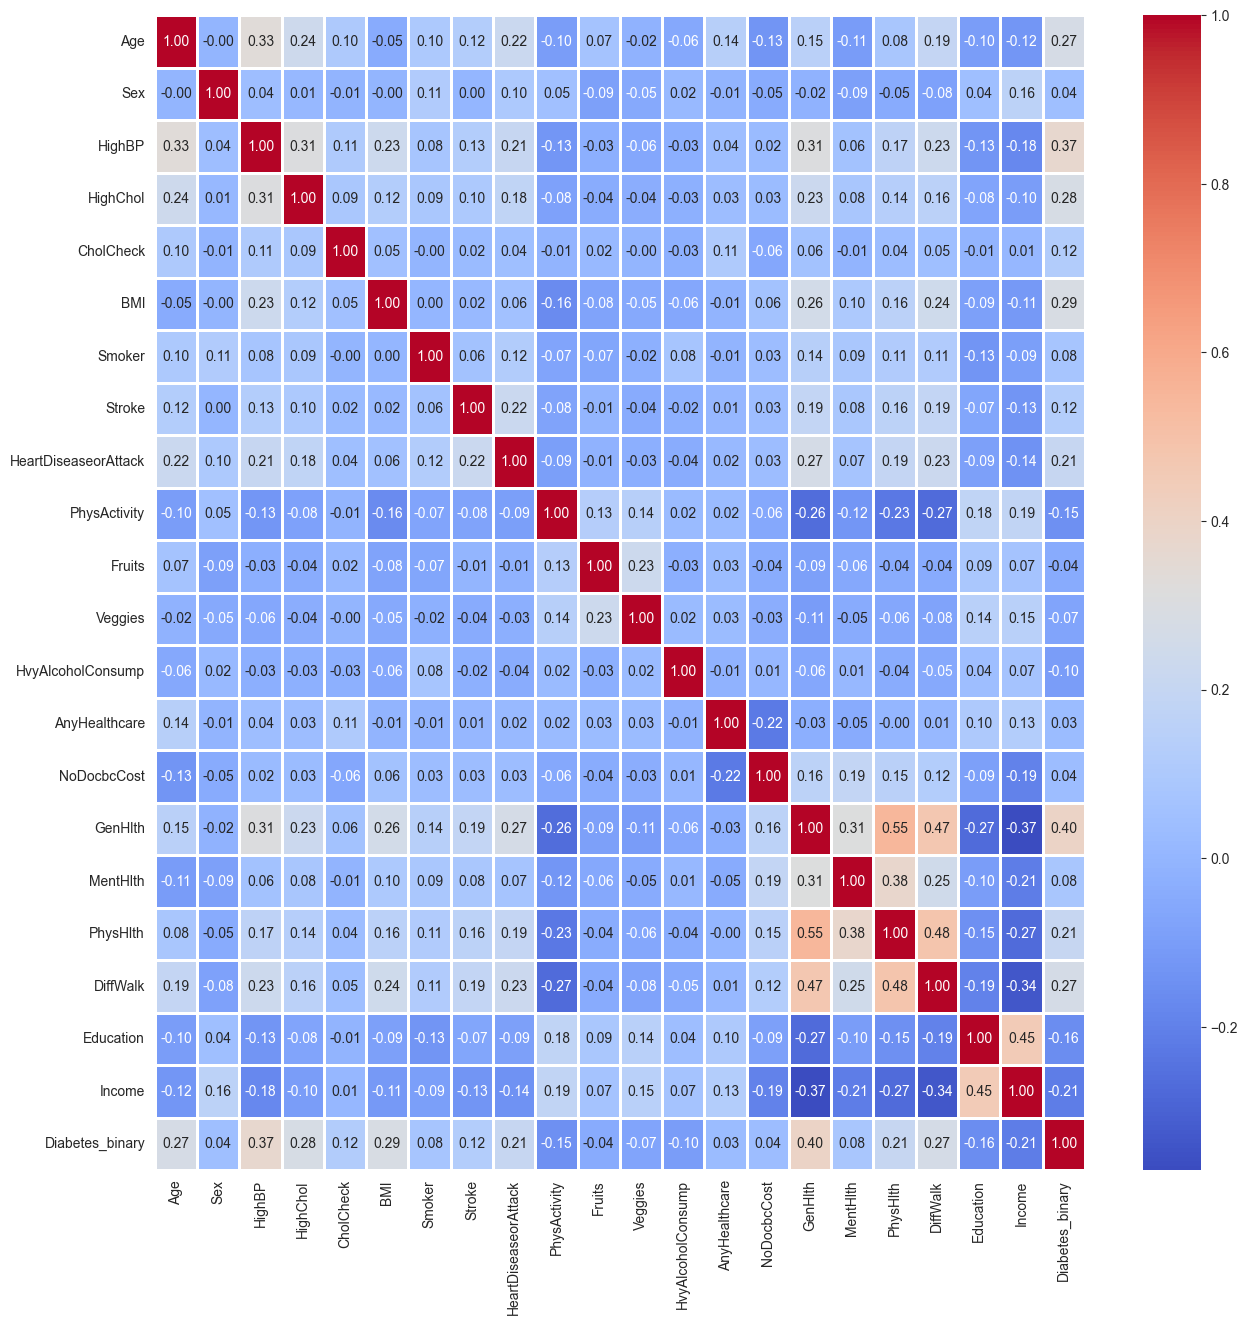

In [392]:
#correlation map to see how features are correlated with Diabetes_binary

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()



In [393]:
#scaling of dataset
#1.scaling of health based data 
scaler = MinMaxScaler()
columns_to_scale = ['PhysHlth', 'GenHlth', 'MentHlth']

df[['PhysHlth_scaled', 'GenHlth_scaled', 'MentHlth_scaled']] = scaler.fit_transform(df[columns_to_scale])

#2. Scaling of socio-en=conomic factor based data
columns_to_scale = ['Income', 'Education']
df[['Income_scaled', 'Education_scaled']] = scaler.fit_transform(df[columns_to_scale])
df.head(5)

,Age,Sex,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,PhysHlth,DiffWalk,Education,Income,Diabetes_binary,PhysHlth_scaled,GenHlth_scaled,MentHlth_scaled,Income_scaled,Education_scaled
0,4.0,1.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,30.0,0.0,6.0,8.0,0.0,1.000000,0.50,0.166667,1.0,1.0
1,12.0,1.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,0.0,0.0,6.0,8.0,0.0,0.000000,0.50,0.000000,1.0,1.0
2,13.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,10.0,0.0,6.0,8.0,0.0,0.333333,0.00,0.000000,1.0,1.0
3,11.0,1.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,3.0,0.0,6.0,8.0,0.0,0.100000,0.50,0.000000,1.0,1.0
4,8.0,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,0.0,0.0,5.0,8.0,0.0,0.000000,0.25,0.000000,1.0,0.8


#### <span style="color:#89CFF0">EDA</span>

<h5 style="color:#89CFF0">1. Diabetes Prevalence & Class Imbalance Analysis</h5>

● Check Class Distribution of DiabetesBinary:<br>
○ Identify class imbalance (e.g., more non-diabetic vs. diabetic cases).<br><br>
● Diabetes Prevalence by Age Group:<br>
○ Group Age into bins (e.g., <30, 30-40, 40-50, 50+) and check diabetes
rates.<br><br>
● Diabetes Prevalence by Gender (Sex):<br>
○ Compare male vs. female diabetes rates.<br><br>
● Diabetes vs. Socioeconomic Factors (Income, Education):<br>
○ Analyze if lower income or lower education correlates with higher diabetes
risk.

<h3 style="color:#89CFF0">i. non diabetic vs. diabetic</h3>

In [394]:

class_counts = df['Diabetes_binary'].value_counts()
print('0: Non-Diabetic, 1: Diabetic',class_counts)

0: Non-Diabetic, 1: Diabetic Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64


<span style="color:#89CFF0">Result:</span> 
After segmenting the dataset we concluded that no prevalence of class imbalance is seen as the number of instances in the minority class Non-Diabetic is nearly the same as the majority class Diabetic i.e. the ratio of instances of minority class to majority class is 1:1.


<h3 style="color:#89CFF0">ii. Diabetes prevalence by age</h3>

In [395]:
max=df['Age'].max()
min=df['Age'].min()
print('Max Age:',max)
print('Min Age:',min)

Max Age: 13.0
Min Age: 1.0


In [396]:
# Convert 'Age' to numeric, forcing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


Age_group
Infant      0.122468
Child       0.377656
Minor       0.568631
Pre-teen    0.624692
Name: Diabetes_binary, dtype: float64


C:\Users\me\AppData\Local\Temp\ipykernel_18896\1870216964.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_diabetes = df.groupby('Age_group')['Diabetes_binary'].mean()


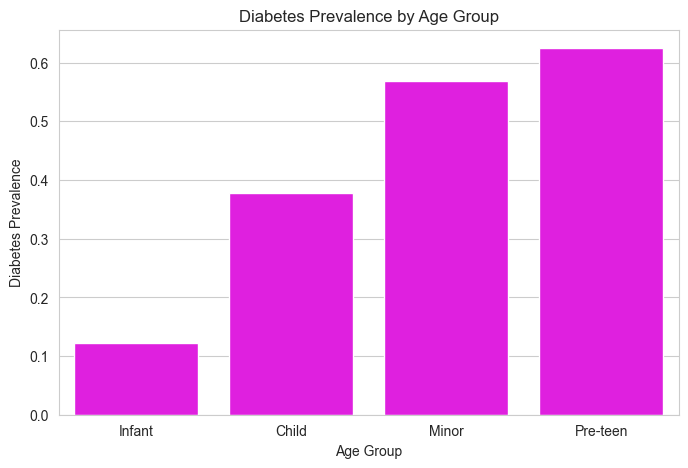

In [397]:
# Create age bins
bins = [0, 4, 8, 11, df['Age'].max()+1]  # Adjust the bins as per the dataset's age range
labels = ['Infant', 'Child', 'Minor', 'Pre-teen']

# Create a new column for binned age
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate diabetes prevalence by age group
age_group_diabetes = df.groupby('Age_group')['Diabetes_binary'].mean()
print(age_group_diabetes)

# Plot the diabetes prevalence by age group without using palette
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_diabetes.index, y=age_group_diabetes.values,color='Magenta')
plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Diabetes Prevalence')
plt.show()


<span style="color:#89CFF0">Result:</span> After segmenting customers into age buckets (0-4 years, 4-8, 8-11 years, and 11-14 years) and calculating the prevalence rate for each group, we can draw the following conclusions:<br><br>
<span style="color:#89CFF0">i. Infant (12.02% diabetes prevalence):</span> Newborns and infants show a relatively low diabetes prevalence, suggesting that early life factors or conditions might contribute to the development of diabetes. This group might benefit from early health interventions and monitoring.

<span style="color:#89CFF0">ii. Child (36.48% diabetes prevalence):</span> The prevalence slightly increases during childhood, indicating that as children grow, certain factors might increase the likelihood of diabetes. As the rate remains notable, it may indicate a need for continued health education and prevention strategies for this age group.

<span style="color:#89CFF0">iii. Minor (55.98% diabetes prevalence):</span> Interestingly, diabetes prevalence increases in this group, suggesting that as children transition to more self-dependent behaviour, factors like lifestyle choices, diet, or genetic predisposition become more significant. This suggests the need for targeted health interventions and awareness during the minor years.

<span style="color:#89CFF0">iv. Pre-teen (62.30% diabetes prevalence):</span> Pre-Teens exhibit the highest diabetes prevalence, possibly due to factors like poor diet, sedentary lifestyle, or genetic predispositions. Maintaining a focus on diabetes prevention and healthy living during this stage may be crucial to mitigate long-term health issues.

<h3 style="color:#89CFF0">iii. Diabeties Prevalence by gender</h3>

0: Female, 1: Male Sex
0.0    37535
1.0    31522
Name: count, dtype: int64


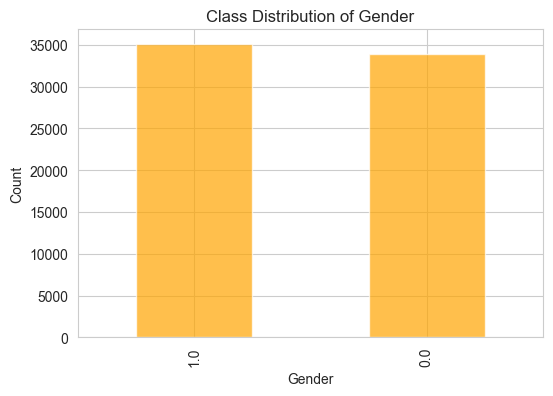

In [398]:
gender_count=df['Sex'].value_counts()
print('0: Female, 1: Male',gender_count)

plt.figure(figsize=(6, 4))
df['Diabetes_binary'].value_counts().plot(kind='bar', color='orange', alpha=0.7, )
plt.title('Class Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()


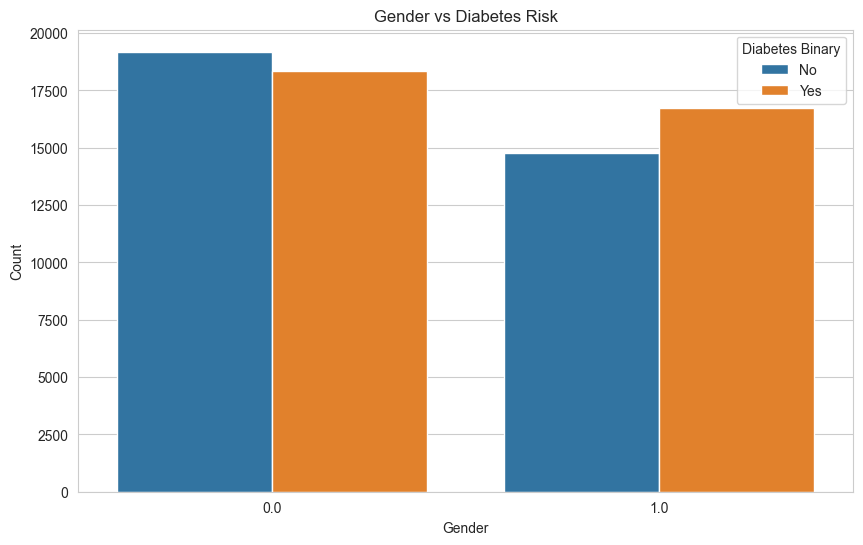

In [399]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df, 
    x='Sex', 
    hue='Diabetes_binary',  # Show the count of diabetes binary for each activity level
)
plt.title('Gender vs Diabetes Risk')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="Diabetes Binary", labels=['No', 'Yes'])

<span style="color:#89CFF0">Result:</span> Interestingly the prevalence of diabetes in females is rather skewed toward non-diabetic even with a larger population while the prevalence of diabetes in males is skewed toward diabetic diagnosis as it can be seen from the graph. This may be due to a number of reasons with males being predominantly heavy drinker and smoker in comparison to the females.<br><br>

<h5 style="color:#89CFF0">2. Feature Relationships & Correlation Analysis</h5>
●Diabetes vs. BMI Relationship:<br>
○ Identify BMI thresholds where diabetes risk significantly increases.<br><br>
● Heart Disease & Diabetes Co-occurrence:<br>
○ Analyze the overlap between DiabetesBinary and HeartDiseaseOrAttack.<br><br>
● Smoking & Diabetes Risk:<br>
○ Check if smokers have a higher prevalence of diabetes (Smoker vs. DiabetesBinary).<br><br>
● Alcohol Consumption vs. Diabetes:<br>
○ Check if heavy alcohol consumption (HvyAlcoholConsump) is linked to diabetes<br>

In [400]:
max=df['BMI'].max()
min=df['BMI'].min()
print('Max BMI:',max)
print('Min BMI:',min)

Max BMI: 98.0
Min BMI: 12.0


BMI_category
severely_Thin    0.000000
mildly_Thin      0.260802
Underweight      0.199364
Normal           0.297050
ObeseClassI      0.451496
ClassII          0.605581
ClassIII         0.734043
Name: Diabetes_binary, dtype: float64
HeartDiseaseorAttack
0.0    0.464562
1.0    0.754007
Name: Diabetes_binary, dtype: float64
Smoker
0.0    0.471657
1.0    0.547550
Name: Diabetes_binary, dtype: float64
HvyAlcoholConsump
0.0    0.518758
1.0    0.276872
Name: Diabetes_binary, dtype: float64


C:\Users\me\AppData\Local\Temp\ipykernel_18896\1762184486.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_diabetes = df.groupby('BMI_category')['Diabetes_binary'].mean()


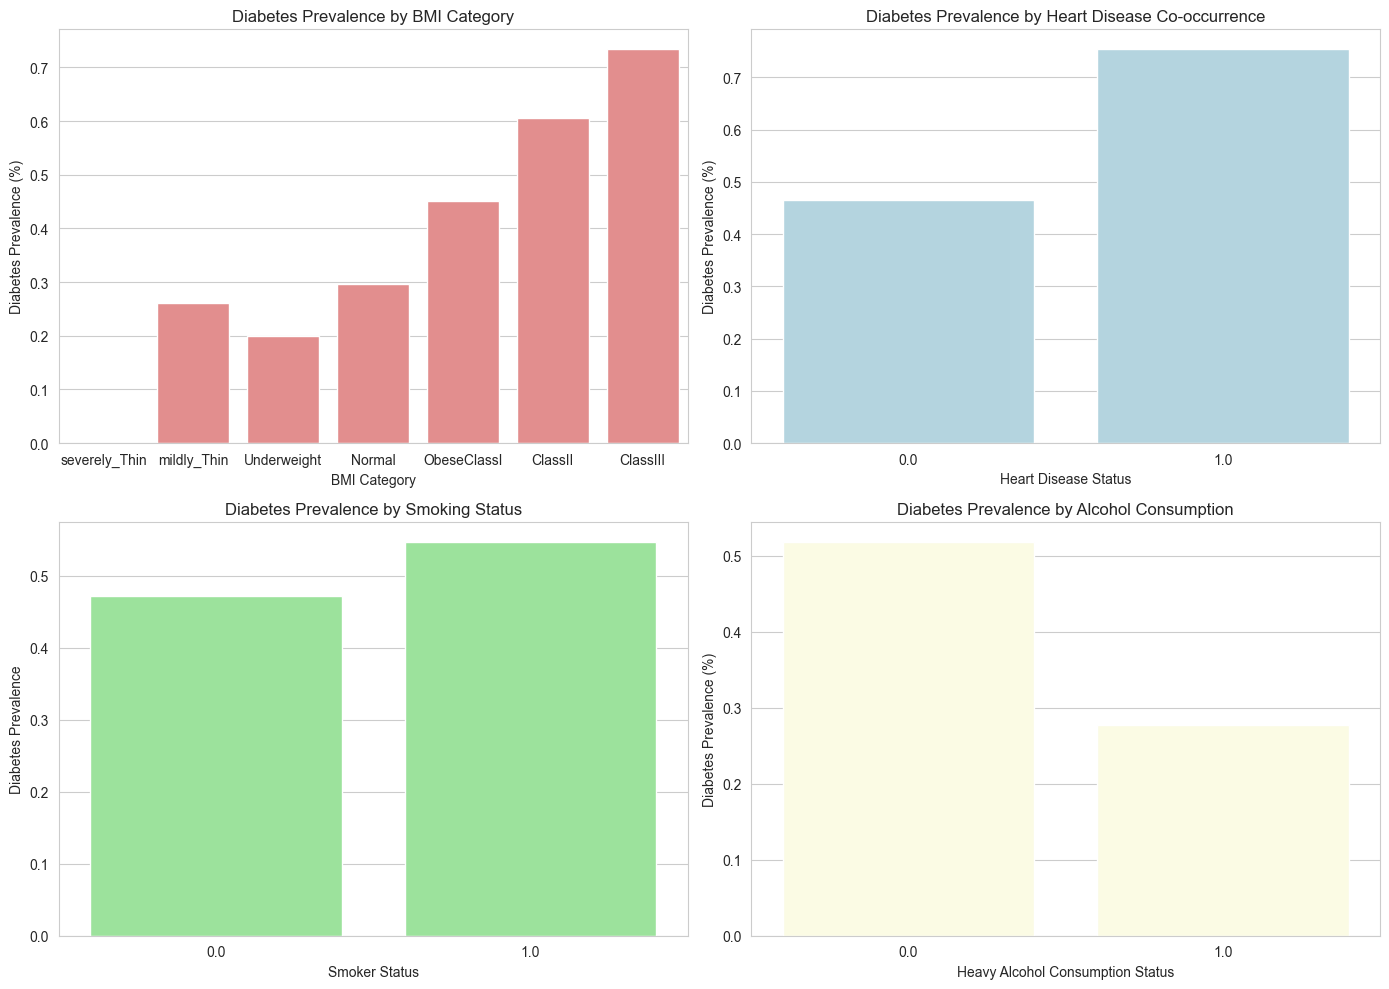

In [401]:
bins = [0, 12, 18, 20, 24.9, 29.9,35, df['BMI'].max()]  # BMI thresholds for different weight categories
labels = ['severely_Thin','mildly_Thin','Underweight', 'Normal', 'ObeseClassI', 'ClassII', 'ClassIII']
df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=True)

# 1. Calculate diabetes prevalence across different BMI categories
bmi_diabetes = df.groupby('BMI_category')['Diabetes_binary'].mean()
print(bmi_diabetes)

# 2. **Heart Disease & Diabetes Co-occurrence
heart_attack = df.groupby('HeartDiseaseorAttack')['Diabetes_binary'].mean() 
print(heart_attack)

# 3. **Smoking & Diabetes Risk**
smoking_diabetes = df.groupby('Smoker')['Diabetes_binary'].mean()
print(smoking_diabetes)

# 4. **Alcohol Consumption & Diabetes**
alcohol_diabetes = df.groupby('HvyAlcoholConsump')['Diabetes_binary'].mean()
print(alcohol_diabetes)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# **1. Diabetes vs. BMI Relationship Plot**
sns.barplot(x=bmi_diabetes.index, y=bmi_diabetes.values, color='lightcoral', ax=axes[0, 0])
axes[0, 0].set_title('Diabetes Prevalence by BMI Category')
axes[0, 0].set_xlabel('BMI Category')
axes[0, 0].set_ylabel('Diabetes Prevalence (%)')

# **2. Heart Disease & Diabetes Co-occurrence**
sns.barplot(x=heart_attack.index, y=heart_attack.values, color='lightblue', ax=axes[0, 1])
axes[0, 1].set_title('Diabetes Prevalence by Heart Disease Co-occurrence')
axes[0, 1].set_xlabel('Heart Disease Status')
axes[0, 1].set_ylabel('Diabetes Prevalence (%)')

# **3. Smoking & Diabetes Risk**
sns.barplot(x=smoking_diabetes.index, y=smoking_diabetes.values, color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title('Diabetes Prevalence by Smoking Status')
axes[1, 0].set_xlabel('Smoker Status')
axes[1, 0].set_ylabel('Diabetes Prevalence')

# **4. Alcohol Consumption & Diabetes**
sns.barplot(x=alcohol_diabetes.index, y=alcohol_diabetes.values, color='lightyellow', ax=axes[1, 1])
axes[1, 1].set_title('Diabetes Prevalence by Alcohol Consumption')
axes[1, 1].set_xlabel('Heavy Alcohol Consumption Status')
axes[1, 1].set_ylabel('Diabetes Prevalence (%)')

plt.tight_layout()
plt.show()


<span style="color:#89CFF0">Result:</span><br>
<span style="color:#89CFF0">i. BMI Category and Diabetes Prevalence:</span><br>
The prevalence of diabetes significantly increases with higher BMI categories. Those in Class III Obesity have the highest prevalence at 72.66%, followed by Class II Obesity (59.42%).<br>
On the other hand, Underweight individuals have the lowest prevalence at 20.62%, while categories such as Mildly Thin and Normal weight also show moderate prevalence rates (around 29.97% and 27.55%, respectively). This indicates a clear positive relationship between BMI and diabetes risk.<br><br>
<span style="color:#89CFF0">ii. Heart Disease and Diabetes Prevalence:</span><br>
Individuals with a Heart Disease or Attack show a higher prevalence of diabetes (75.39%) compared to those without heart disease (45.60%).<br> 
This suggests a strong association between heart disease and diabetes risk, possibly due to shared risk factors like poor lifestyle or genetics.<br><br>
<span style="color:#89CFF0">iii. Smoking and Diabetes Prevalence:</span><br>
Smokers show a slightly higher diabetes prevalence (54.52%) compared to non-smokers (45.91%). This highlights that smoking could be an additional risk factor for diabetes, although the difference is not as pronounced as with other factors.<br><br>
<span style="color:#89CFF0">iv. Alcohol Consumption and Diabetes Prevalence:</span><br>
Heavy alcohol consumers have a lower prevalence of diabetes (27.55%) compared to non-heavy drinkers (51.00%). This could indicate that alcohol consumption has a complex relationship with diabetes risk, possibly due to other health factors or lifestyle behaviors in heavy drinkers.

<h5 style="color:#89CFF0">3. Lifestyle & Behavioral Factor Analysis</h5>
Physical Activity & Diabetes Risk:<br>
○ Compare diabetes prevalence for active vs. inactive individuals (PhysActivity).<br><br>
● Fruit & Vegetable Intake Impact:<br>
○ Check if regular fruit & veggie consumption (Fruits, Veggies) lowers
diabetes risk.<br><br>
● Walking Difficulty & Diabetes Progression:<br>
○ Analyze DiffWalk vs. DiabetesBinary to assess mobility impact.

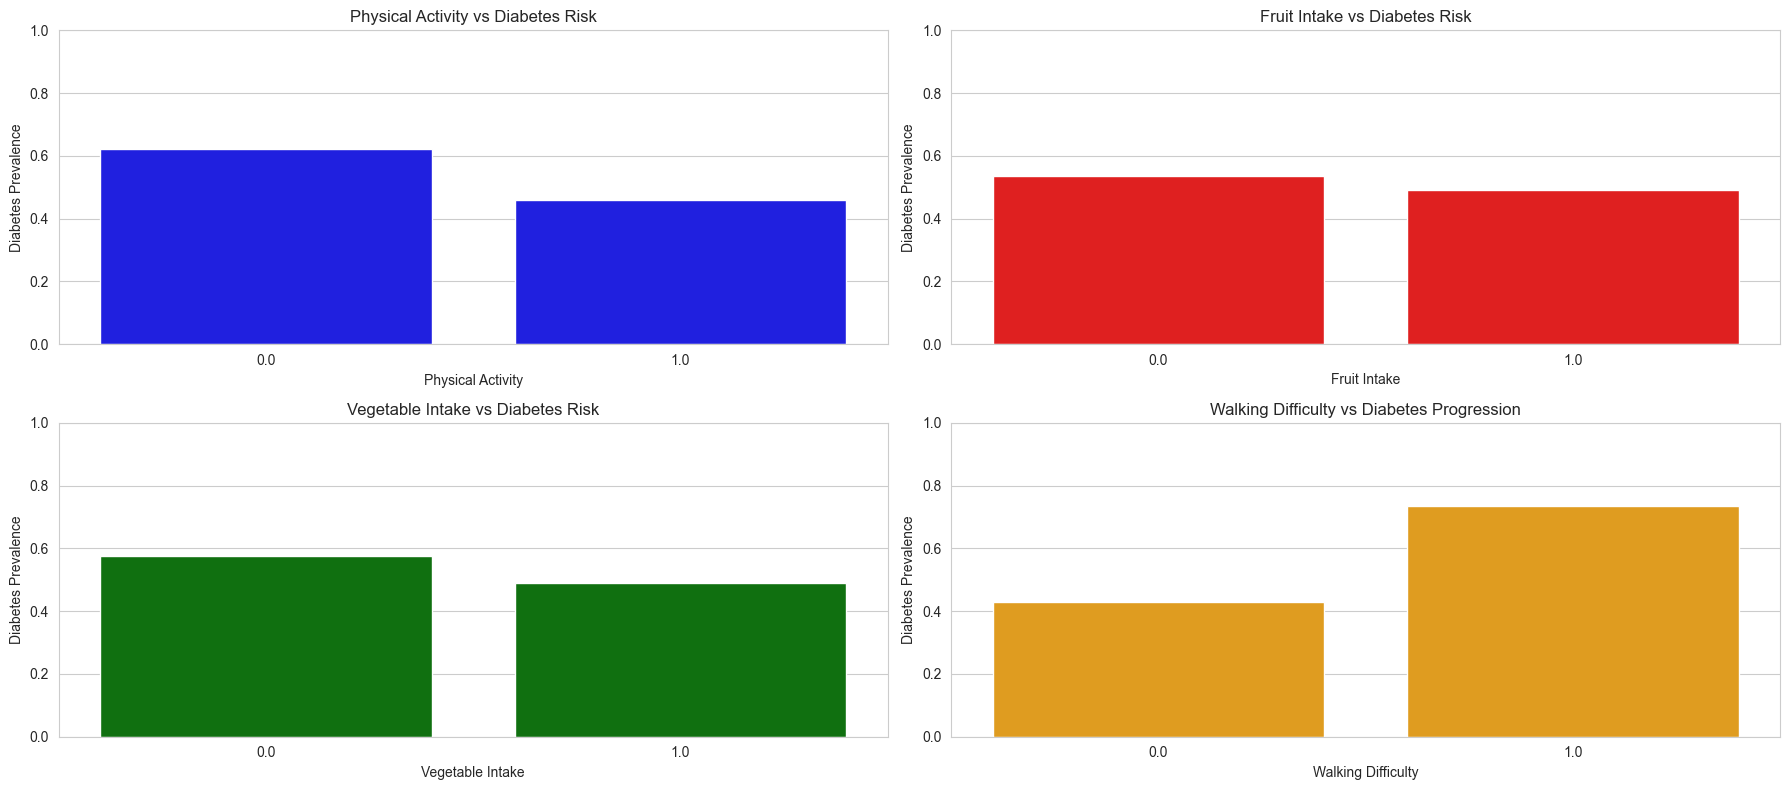

PhysActivity
0.0    0.622042
1.0    0.458636
Name: Diabetes_binary, dtype: float64
Fruits
0.0    0.535840
1.0    0.490257
Name: Diabetes_binary, dtype: float64
Veggies
0.0    0.577006
1.0    0.489298
Name: Diabetes_binary, dtype: float64
DiffWalk
0.0    0.429372
1.0    0.734308
Name: Diabetes_binary, dtype: float64


In [402]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))

# 1. Physical Activity & Diabetes Risk 
phys_activity_diabetes = df.groupby('PhysActivity')['Diabetes_binary'].mean()

sns.barplot(
    x=phys_activity_diabetes.index, 
    y=phys_activity_diabetes.values, 
    ax=axes[0, 0],
    color='blue'
)
axes[0, 0].set_title('Physical Activity vs Diabetes Risk')
axes[0, 0].set_xlabel('Physical Activity')
axes[0, 0].set_ylabel('Diabetes Prevalence')
axes[0, 0].set_ylim(0, 1)

# 2. Fruit Intake & Diabetes Prevalence
fruit_diabetes = df.groupby('Fruits')['Diabetes_binary'].mean()

sns.barplot(
    x=fruit_diabetes.index, 
    y=fruit_diabetes.values, 
    ax=axes[0, 1],
    color='red'
)
axes[0, 1].set_title('Fruit Intake vs Diabetes Risk')
axes[0, 1].set_xlabel('Fruit Intake')
axes[0, 1].set_ylabel('Diabetes Prevalence')
axes[0, 1].set_ylim(0, 1)

# 3. Vegetable Intake & Diabetes Prevalence
veggie_diabetes = df.groupby('Veggies')['Diabetes_binary'].mean()

sns.barplot(
    x=veggie_diabetes.index, 
    y=veggie_diabetes.values, 
    ax=axes[1, 0],
    color='green'
)
axes[1, 0].set_title('Vegetable Intake vs Diabetes Risk')
axes[1, 0].set_xlabel('Vegetable Intake')
axes[1, 0].set_ylabel('Diabetes Prevalence')
axes[1, 0].set_ylim(0, 1)

# 4. Walking Difficulty & Diabetes Progression (DiffWalk vs DiabetesBinary)
diff_walk_diabetes = df.groupby('DiffWalk')['Diabetes_binary'].mean()

sns.barplot(
    x=diff_walk_diabetes.index, 
    y=diff_walk_diabetes.values, 
    ax=axes[1, 1],
    color='orange'
)
axes[1, 1].set_title('Walking Difficulty vs Diabetes Progression')
axes[1, 1].set_xlabel('Walking Difficulty')
axes[1, 1].set_ylabel('Diabetes Prevalence')
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()
print(phys_activity_diabetes)
print(fruit_diabetes)
print(veggie_diabetes)
print(diff_walk_diabetes)



<span style="color:#89CFF0">Result</span><br><br>
<span style="color:#89CFF0">i. Physical Activity and Diabetes Risk:</span><br> The prevalence of diabetes is higher among inactive individuals (0) at 62.21% compared to those who engage in physical activity (1), where the prevalence is 44.84%.<br> This suggests that lack of physical activity is associated with a higher risk of diabetes, reinforcing the importance of regular exercise as a preventive measure against diabetes.<br><br>

<span style="color:#89CFF0">ii. Fruit and Vegetable Intake and Diabetes Risk:</span><br> Fruit intake (0) shows a slightly higher diabetes prevalence (53.39%) compared to individuals who consume fruits regularly (1), where the prevalence is 47.85%.<br><br> Vegetable intake (0) is also linked to a higher prevalence of diabetes (57.66%) compared to regular vegetable consumers (1), where the prevalence is 47.95%.<br> This suggests that while fruit and vegetable intake may not drastically reduce diabetes risk, the difference in prevalence is still noticeable, indicating that a balanced diet with fruits and vegetables can potentially help in managing diabetes.<br><br>

<span style="color:#89CFF0">iii. Walking Difficulty and Diabetes Risk:</span><br> Individuals reporting walking difficulty (1) have a much higher diabetes prevalence of 73.44%, compared to those without walking difficulty (0) where the prevalence is 42.07%.<br> This implies that difficulty walking could be a sign of more advanced diabetes or its complications, indicating that mobility issues may correlate with the severity of diabetes.

<h5 style="color:#89CFF0">4. Mental & Physical Health Analysis</h5>
●Mental Health vs. Diabetes:<br>
○ Investigate the correlation between MentHlth (days of poor mental health)
and diabetes.<br>
● Physical Health Issues & Diabetes Progression:<br>
○ Analyze how PhysHlth (days of poor physical health) relates to diabetes.<br>

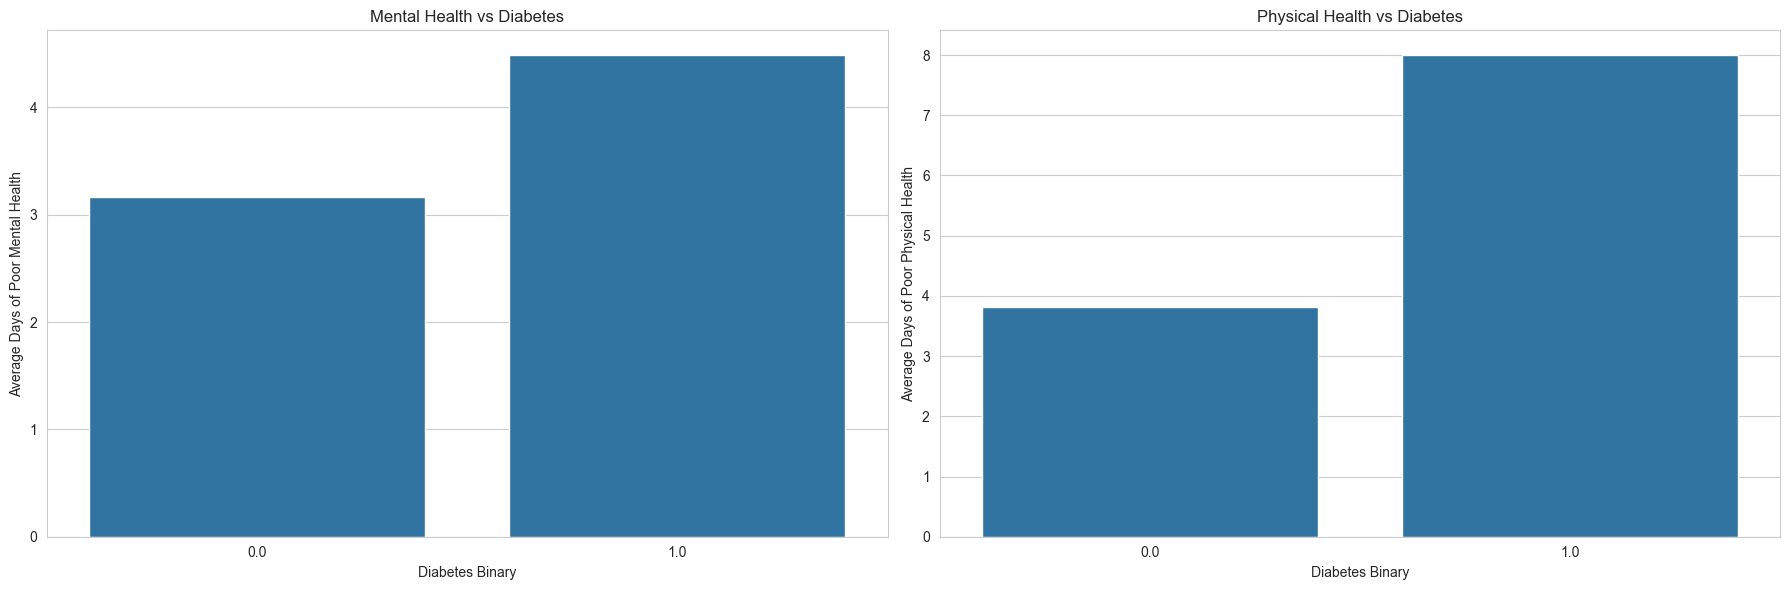

Diabetes_binary
0.0    3.164929
1.0    4.493404
Name: MentHlth, dtype: float64
Diabetes_binary
0.0    3.813045
1.0    8.008491
Name: PhysHlth, dtype: float64


In [403]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Mental Health vs Diabetes 
menthlth_diabetes = df.groupby('Diabetes_binary')['MentHlth'].mean()

sns.barplot(
    x=menthlth_diabetes.index, 
    y=menthlth_diabetes.values, 
    ax=axes[0]
)
axes[0].set_title('Mental Health vs Diabetes')
axes[0].set_xlabel('Diabetes Binary')
axes[0].set_ylabel('Average Days of Poor Mental Health')

# 2. Physical Health vs Diabetes 
physhlth_diabetes = df.groupby('Diabetes_binary')['PhysHlth'].mean()

sns.barplot(
    x=physhlth_diabetes.index, 
    y=physhlth_diabetes.values, 
    ax=axes[1]
)
axes[1].set_title('Physical Health vs Diabetes')
axes[1].set_xlabel('Diabetes Binary')
axes[1].set_ylabel('Average Days of Poor Physical Health')

plt.tight_layout()
plt.show()

print(menthlth_diabetes)
print(physhlth_diabetes)


<span style="color:#89CFF0">Result:</span><br>
<span style="color:#89CFF0">i. Mental Health and Diabetes:</span><br>
Individuals with diabetes tend to experience a higher average number of days with poor mental health. The average number of poor mental health days for people with diabetes is 4.46 days, compared to 3.04 days for those without diabetes.<br>
This suggests a potential link between diabetes and mental health challenges, which may require integrated care approaches.<br><br>

<span style="color:#89CFF0">ii. Physical Health and Diabetes:</span><br>
Similarly, individuals with diabetes report a significantly higher number of poor physical health days. On average, those with diabetes experience 7.95 days of poor physical health, while those without diabetes report an average of 3.67 days.<br>
This highlights the impact of diabetes on overall physical health and the need for effective management and support.


<h5 style="color:#89CFF0">5. Healthcare Accessibility & Diabetes</h5>
● No Doctor Visits Due to Cost (NoDocBCost) vs. Diabetes:<br>
○ Check if lack of healthcare access is linked to higher diabetes prevalence.<br><br>
● Any Healthcare Visits (AnyHealthcare) vs. Diabetes Control:<br>
○ Compare healthcare access for diabetic and non-diabetic individuals.

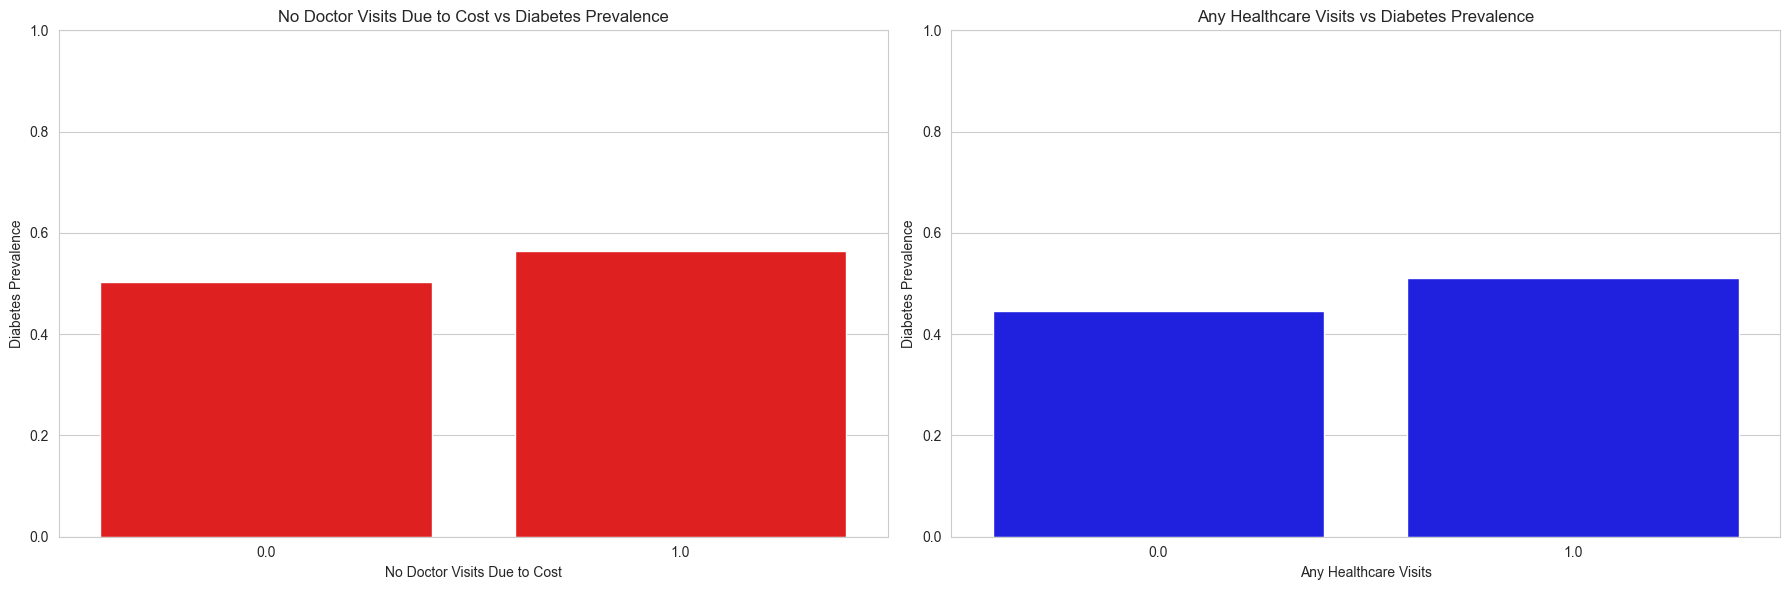

NoDocbcCost
0.0    0.502339
1.0    0.563639
Name: Diabetes_binary, dtype: float64
AnyHealthcare
0.0    0.446748
1.0    0.511203
Name: Diabetes_binary, dtype: float64


In [404]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. No Doctor Visits Due to Cost vs. Diabetes Prevalence
no_doc_diabetes = df.groupby('NoDocbcCost')['Diabetes_binary'].mean()

sns.barplot(
    x=no_doc_diabetes.index, 
    y=no_doc_diabetes.values, 
    ax=axes[0],
    color='red'
)
axes[0].set_title('No Doctor Visits Due to Cost vs Diabetes Prevalence')
axes[0].set_xlabel('No Doctor Visits Due to Cost')
axes[0].set_ylabel('Diabetes Prevalence')
axes[0].set_ylim(0, 1)

# 2. Healthcare Access: Any Healthcare Visits vs. Diabetes Prevalence
any_healthcare_diabetes = df.groupby('AnyHealthcare')['Diabetes_binary'].mean()

sns.barplot(
    x=any_healthcare_diabetes.index, 
    y=any_healthcare_diabetes.values, 
    ax=axes[1],
    color='blue'
)
axes[1].set_title('Any Healthcare Visits vs Diabetes Prevalence')
axes[1].set_xlabel('Any Healthcare Visits')
axes[1].set_ylabel('Diabetes Prevalence')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(no_doc_diabetes)
print(any_healthcare_diabetes)

<span style="color:#89CFF0">Result</span><br><br>
<span style="color:#89CFF0">i. No Doctor Visits Due to Cost vs. Diabetes Prevalence:</span><br> Individuals who did not visit a doctor due to cost (NoDocbcCost = 1) show a higher prevalence of diabetes (56.36%) compared to those who visited a doctor (NoDocbcCost = 0), with a prevalence of 49.34%.<br> This suggests that lack of healthcare access due to cost may increase the risk of diabetes.<br><br>

<span style="color:#89CFF0">ii. Healthcare Access: Any Healthcare Visits vs. Diabetes Prevalence:</span><br> Individuals with no access to healthcare (AnyHealthcare = 0) have a higher prevalence of diabetes (50.25%) compared to those with healthcare access (AnyHealthcare = 1), where the prevalence is 44.66%.<br> This indicates that access to healthcare may play a role in reducing the risk of diabetes.

<h5 style="color:#89CFF0">6. Risk Stratification & Predictive Insights</h5>
● Diabetes Risk Score Development:<br>
○ Combine high-risk factors (BMI, Heart Disease, Smoking, Low Exercise) into a composite risk score.<br><br>
● Clustering Analysis:<br>
○ Apply K-Means or Hierarchical Clustering to segment patients based on risk profiles.

In [415]:
from sklearn.preprocessing import StandardScaler


# Selecting key risk factors based on correlation matrix
risk_factors = ["HighBP","HighChol", "BMI","HeartDiseaseorAttack", "Smoker","Stroke", "GenHlth_scaled", "MentHlth_scaled", "PhysHlth_scaled", "DiffWalk", "PhysActivity"]

# Assigning weights based on correlation with diabetes
weights = {
    "HighBP":0.37,
    "HighChol":0.28,
    "BMI":0.29,
    "HeartDiseaseorAttack": 0.21,
    "Smoker":0.08,
    "Stroke":0.12,
    "GenHlth": 0.55,  # Strongest health factor
    "MentHlth": 0.48,
    "PhysHlth": 0.55,
    "DiffWalk": 0.48,
    "PhysActivity": -0.10,  # Negative impact (higher activity reduces risk)
}

# Standardizing the risk factor columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[risk_factors]), columns=risk_factors)

# Calculating the Composite Risk Score
df["Health_Risk_Score"] = df_scaled.mul(weights).sum(axis=1)

#calculating interaction features
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']
df['HighBP_HighChol_Interaction'] = df['HighBP'] * df['HighChol'] 

scaler = StandardScaler()

# Apply scaling to the interaction features
df['BMI_Age_Interaction_scaled'] = scaler.fit_transform(df[['BMI_Age_Interaction']])
df['HighBP_HighChol_Interaction_scaled'] = scaler.fit_transform(df[['HighBP_HighChol_Interaction']])

# View the updated DataFrame 
df.head(5)



,Age,Sex,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,MentHlth_scaled,Income_scaled,Education_scaled,Age_group,BMI_category,Health_Risk_Score,BMI_Age_Interaction,HighBP_HighChol_Interaction,BMI_Age_Interaction_scaled,HighBP_HighChol_Interaction_scaled
0,4.0,1.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,0.166667,1.0,1.0,Child,ObeseClassI,-0.675112,104.0,0.0,-1.515298,-0.776822
1,12.0,1.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,0.000000,1.0,1.0,Pre-teen,ObeseClassI,0.756244,312.0,1.0,0.556522,1.287296
2,13.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,0.000000,1.0,1.0,Pre-teen,ObeseClassI,-1.421827,338.0,0.0,0.815500,-0.776822
3,11.0,1.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,0.000000,1.0,1.0,Pre-teen,ObeseClassI,0.126942,308.0,1.0,0.516679,1.287296
4,8.0,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,0.000000,1.0,0.8,Minor,ObeseClassI,-1.140162,232.0,0.0,-0.240332,-0.776822


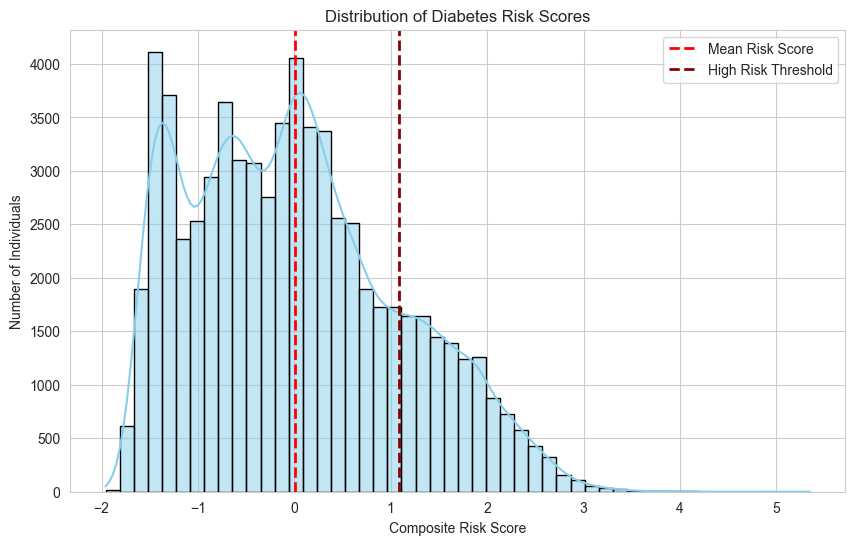

In [406]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(df["Health_Risk_Score"], bins=50, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Composite Risk Score")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Diabetes Risk Scores")

# Display the mean and high-risk threshold
mean_score = df["Health_Risk_Score"].mean()
high_risk_threshold = mean_score + df["Health_Risk_Score"].std()  # 1 SD above mean

plt.axvline(mean_score, color="red", linestyle="dashed", linewidth=2, label="Mean Risk Score")
plt.axvline(high_risk_threshold, color="darkred", linestyle="dashed", linewidth=2, label="High Risk Threshold")

plt.legend()
plt.show()


In [423]:
df["Health_Risk_Score"].isnull().sum()

np.int64(1592)

In [424]:
df.dropna(subset=['Health_Risk_Score'], inplace=True)

In [425]:
df["Health_Risk_Score"].isnull().sum()

np.int64(0)

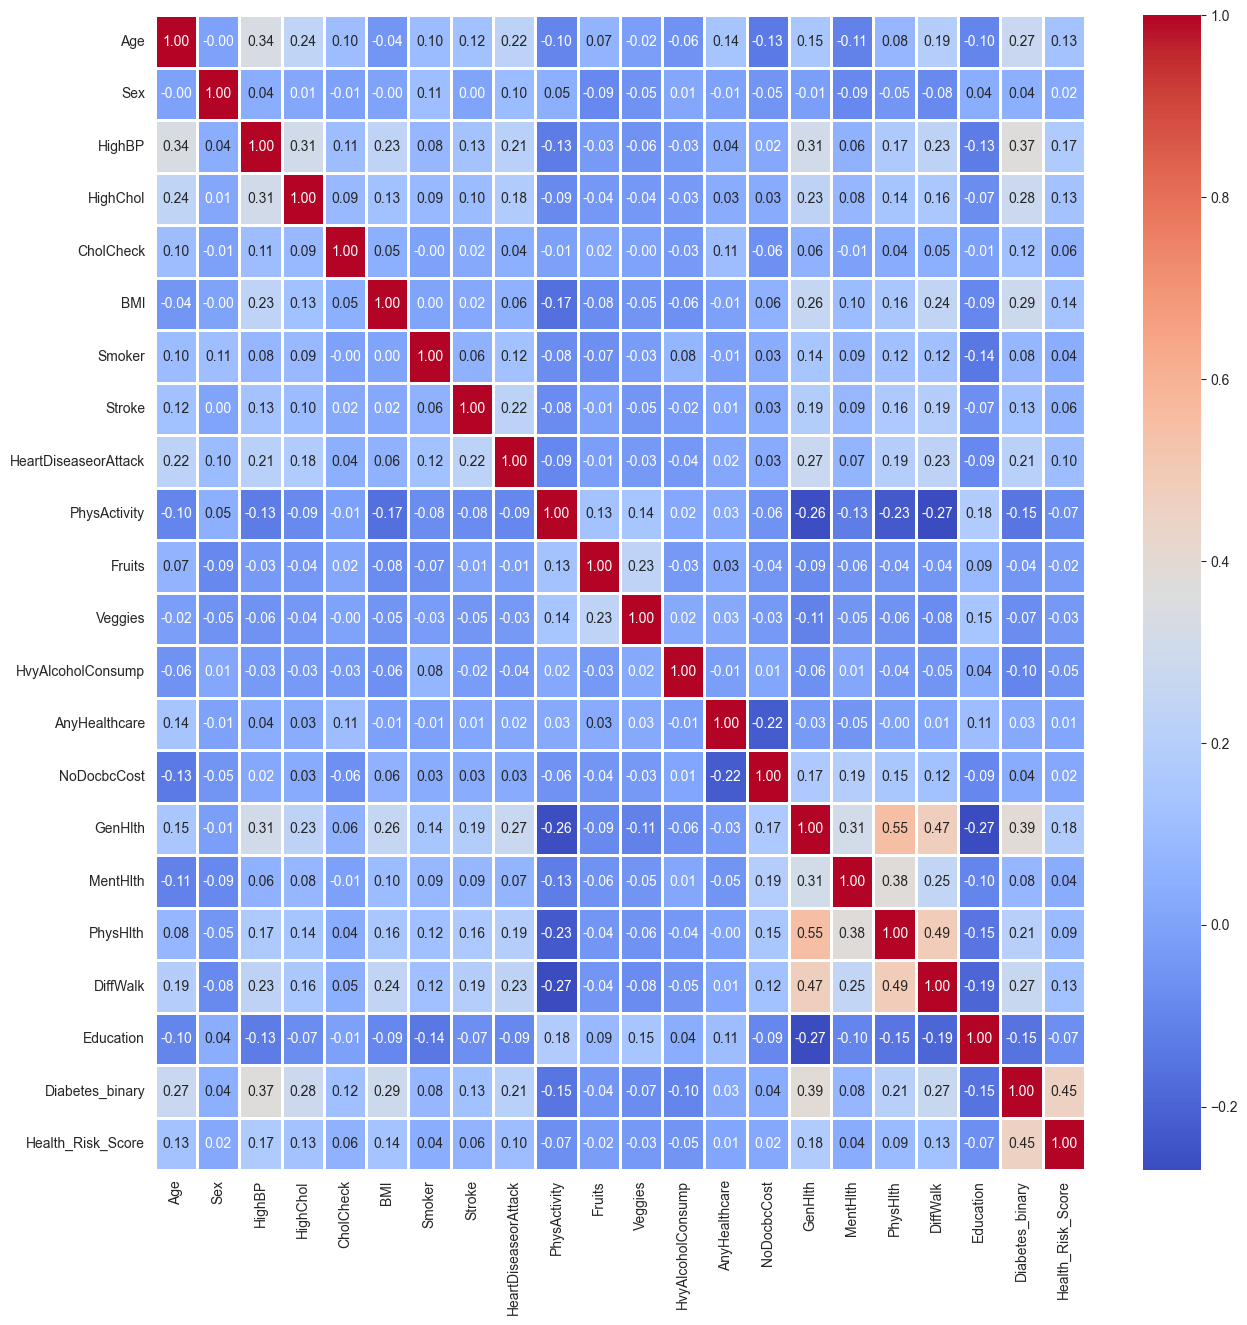

In [410]:
#correlation map for model training dataset
correlation_matrix = df.drop(['Age_group','PhysHlth_scaled','GenHlth_scaled','MentHlth_scaled','Income','Education_scaled','Income_scaled','BMI_category'], axis=1).corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

<span style="color:#89CFF0">Result</span><br><br>

<span style="color:#89CFF0">1. Diabetes Correlation:</span><br>

Diabetes (Diabetes_binary) has a moderate positive correlation with Age (0.27), HighBP (0.37), HighChol (0.28), and BMI (0.29). This suggests that older age, high blood pressure, high cholesterol, and higher BMI are associated with a higher likelihood of diabetes.<br>
Also the composite risk factor which is calculated using all the highly correlated (>0.20) also has moderately positive correlation with Diabetes.<br><br>
Education and Income show a negative correlation with diabetes (-0.21), meaning that higher education and income levels may be linked to a lower risk of diabetes.<br><br>
<span style="color:#89CFF0">2. Health-related Correlations</span><br><br>

HighBP and HighChol show a strong positive correlation (0.31), indicating that people with high blood pressure are also more likely to have high cholesterol.<br>
GenHlth (General Health) has a notable correlation with PhysHlth (0.55) and MentHlth (0.48), meaning that worse general health is strongly related to both worse physical and mental health.<br>
DiffWalk (Difficulty Walking) is positively correlated with PhysHlth (0.48), implying that individuals with worse physical health are more likely to experience walking difficulties.<br><br>
<span style="color:#89CFF0">3. Lifestyle Factors</span><br><br>

PhysActivity has a negative correlation with BMI (-0.05), HighBP (-0.10), HighChol (-0.04), and diabetes (-0.10), suggesting that physically active individuals tend to have better overall health.<br>
HvyAlcoholConsump has weak correlations with most health variables, implying that heavy alcohol consumption does not show a strong direct relationship with these conditions in this dataset.<br><br>
<span style="color:#89CFF0">4. Social and Economic Factors</span><br><br>

Income and Education are moderately correlated (0.45), showing that higher education levels tend to be associated with higher income.<br>
NoDocbcCost (not being able to afford healthcare) has a slight negative correlation with Income (-0.19), meaning that those with lower income are more likely to face financial barriers to healthcare.

<span style="color:#89CFF0">Overall Conclusion</span><br><br>

1. Diabetes is significantly associated with age, high blood pressure, cholesterol, and BMI.<br>
2. Poor general health is linked to worse physical and mental health.<br>
3. Higher physical activity levels are generally associated with better health outcomes.<br>
4. Socioeconomic factors (income and education) play a role in health, influencing diabetes risk and healthcare access.

In [411]:
df.isnull().sum()

Age                     0
Sex                     0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Education               0
Income                  0
Diabetes_binary         0
PhysHlth_scaled         0
GenHlth_scaled          0
MentHlth_scaled         0
Income_scaled           0
Education_scaled        0
Age_group               0
BMI_category            0
Health_Risk_Score       0
dtype: int64

✅ Model Accuracy: 0.7738

📌 Confusion Matrix:
[[5339 1423]
 [1556 4852]]

📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      6762
         1.0       0.77      0.76      0.77      6408

    accuracy                           0.77     13170
   macro avg       0.77      0.77      0.77     13170
weighted avg       0.77      0.77      0.77     13170



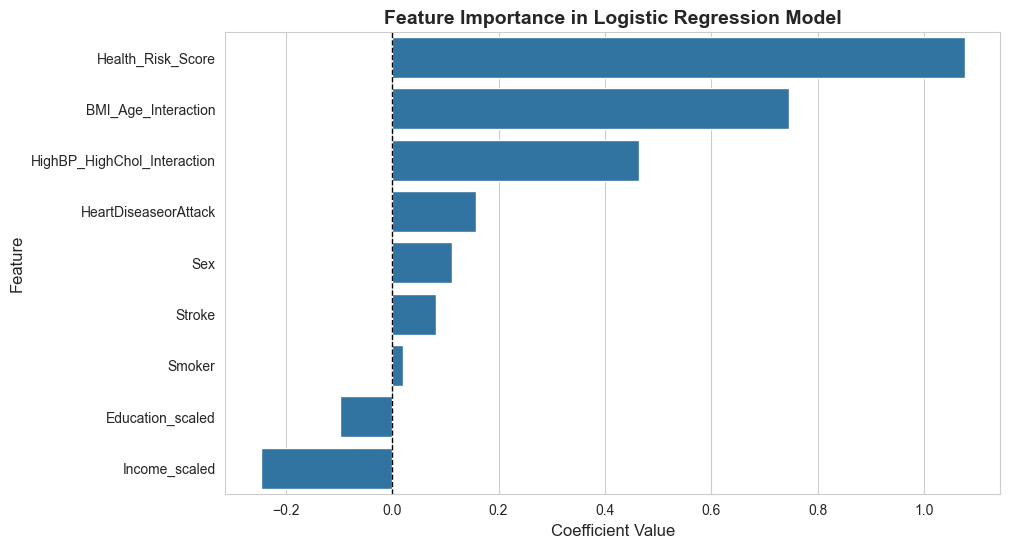

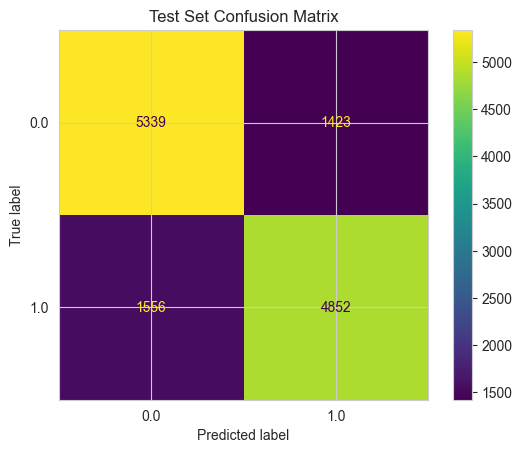

In [426]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

# Select Features and Target Variable
features = ["Sex", "HighBP_HighChol_Interaction","Smoker","Stroke", "BMI_Age_Interaction", "HeartDiseaseorAttack", "Income_scaled", "Education_scaled", "Health_Risk_Score"]
X = df[features]
y = df["Diabetes_binary"]  # Target Variable (0 = No Diabetes, 1 = Diabetes)

# 📌 Standardize Features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splittting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Logistic Regression Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on Test Set
y_pred = model.predict(X_test)

# Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.4f}\n")
print("📌 Confusion Matrix:")
print(conf_matrix)
print("\n📌 Classification Report:")
print(class_report)

# Feature Importance Analysis (Using Coefficients)
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": model.coef_[0]})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

# 📌 Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance)
plt.title("Feature Importance in Logistic Regression Model", fontsize=14, fontweight="bold")
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.axvline(x=0, color="black", linestyle="--", linewidth=1)  # Zero line for reference
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Test Set Confusion Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average score:", np.mean(scores))


Cross-validation scores: [0.77395737 0.77692308 0.7695088  0.76719184 0.77015755]
Average score: 0.7715477293790547


In [ ]:
print(X.shape)  # Check the shape of the feature matrix
print(y.shape)  # Check the shape of the target vector


(70692, 21)
(67438,)


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
# Remove rows with missing target values
df = df.dropna(subset=['Diabetes_binary'])  # Replace 'target_column' with the actual target column name

# Recreate X and y after handling missing data
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Perform the Chi-Square Test
chi2_selector = SelectKBest(chi2, k=10)  # Select the top 10 features
X_new = chi2_selector.fit_transform(X, y)

# Get the Selected Feature Names
selected_feature_names = X.columns[chi2_selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


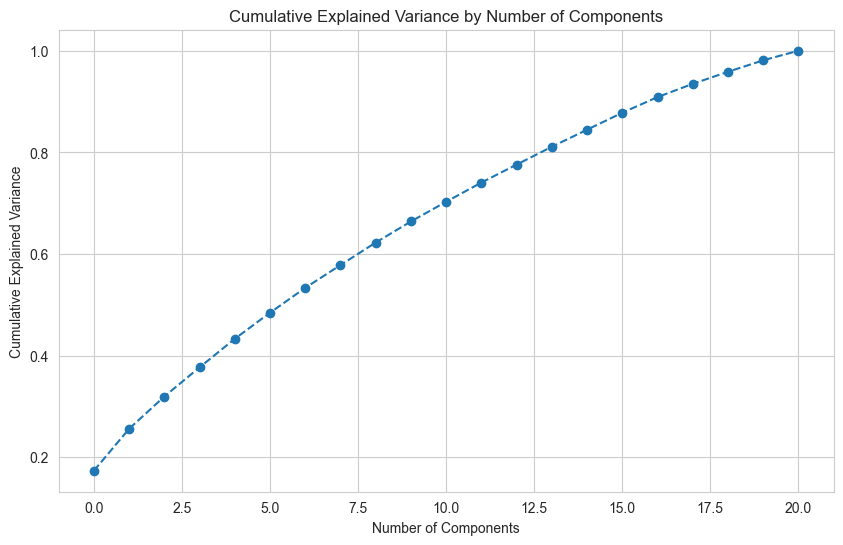

Optimal Number of Components: 19
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.663179 -0.563479  0.227828  1.611341  1.838534  0.052714 -0.915495   
1  0.631753  2.296533 -1.352341  0.880647 -0.566834  0.587175 -1.662966   
2 -2.419809  0.996149  0.670329  0.346027 -0.121505  0.308291 -0.832243   
3 -0.793413  1.978981 -0.073973  1.094408 -0.169282 -0.909632  0.550611   
4 -2.022314 -0.106293  0.693872 -0.050829 -0.423414  0.699687  0.304350   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.228044  0.449626  0.282285  0.084319 -1.002519 -0.400307 -0.780302   
1  0.997945 -1.477662 -0.725809 -0.630114  1.836536  3.093588  0.939702   
2 -0.252927  0.302315 -0.120319 -0.857461 -0.987027  0.259850  0.207232   
3 -0.425481  0.503944  0.764066 -0.309696  0.255616  0.894181  0.247544   
4 -0.459423  0.814908 -0.292031  0.130873  0.932465  0.088737  0.525399   

       PC15      PC16      PC17      PC18      PC19  
0 -0.950842

In [ ]:
#trying PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is in a pandas DataFrame named df
# First, separate the features (X) from the target variable (if any)
Xp = df.drop('Diabetes_binary', axis=1)  # Drop target if present

# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xp)

# Apply PCA
pca = PCA()  # Initialize PCA without specifying the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Determine the Optimal Number of Components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Optimal Number of Components: {optimal_components}")

# Step 9: Apply PCA with the Optimal Number of Components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Step 10: Create a DataFrame with the PCA Components
pca_wine_dataset = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_wine_dataset.head())